In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

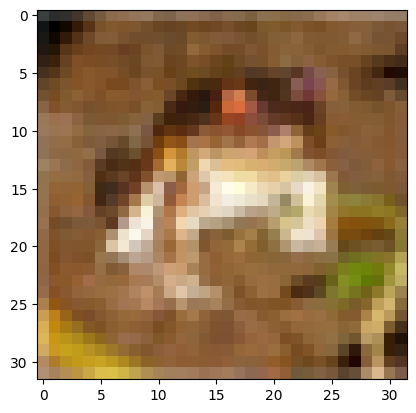

In [5]:
plt.imshow(x_train[0]) # Looks like a frog

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_cat_train = to_categorical(y_train, 10) # 10 classes

In [9]:
y_cat_test = to_categorical(y_test, 10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) # Flatten images from 32 by 32 to 1024 before final layer

model.add(Dense(256, activation='relu')) # 256 Neurons in the dense hidden layer

model.add(Dense(10, activation='softmax')) # 10 possible classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3744 - loss: 1.7076 - val_accuracy: 0.5566 - val_loss: 1.2483
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5682 - loss: 1.2196 - val_accuracy: 0.6124 - val_loss: 1.0978
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6353 - loss: 1.0383 - val_accuracy: 0.6404 - val_loss: 1.0199
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6737 - loss: 0.9329 - val_accuracy: 0.6620 - val_loss: 0.9838
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7123 - loss: 0.8278 - val_accuracy: 0.6457 - val_loss: 1.0406
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7352 - loss: 0.7627 - val_accuracy: 0.6600 - val_loss: 1.0164


In [16]:
metrics = pd.DataFrame(model.history.history)


<Axes: >

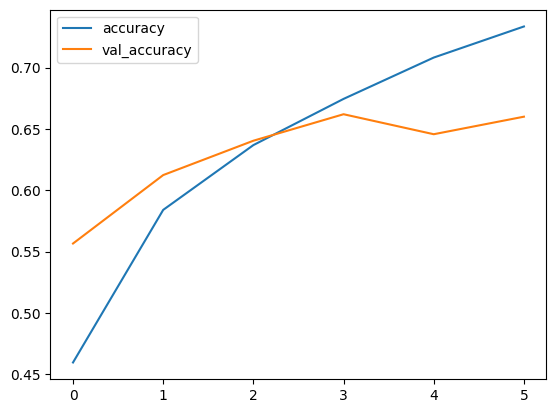

In [17]:
metrics[['accuracy','val_accuracy']].plot() # Looks like we are overfitting

<Axes: >

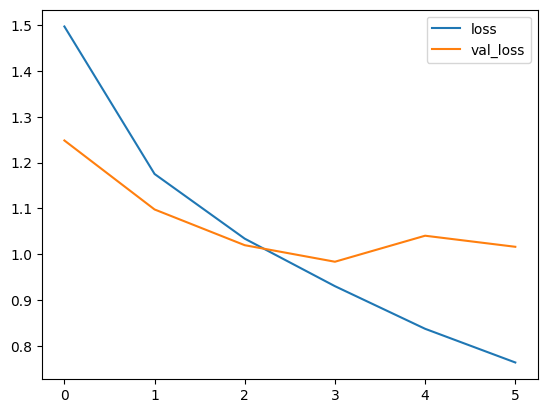

In [18]:
metrics[['loss','val_loss']].plot() # Looks like we are overfitting

In [19]:
model.evaluate(x_test, y_cat_test, verbose=0) # 0.67 accuracy

[1.0164014101028442, 0.6600000262260437]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
print(classification_report(y_test, predictions.argmax(axis=1))) # Regular classification report

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.77      0.79      0.78      1000
           2       0.55      0.54      0.54      1000
           3       0.52      0.38      0.43      1000
           4       0.61      0.62      0.61      1000
           5       0.54      0.62      0.57      1000
           6       0.63      0.84      0.72      1000
           7       0.73      0.72      0.73      1000
           8       0.83      0.68      0.75      1000
           9       0.83      0.65      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [23]:
my_image = x_test[16]

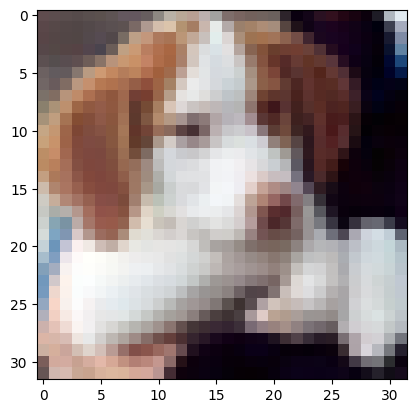

In [24]:
plt.imshow(my_image) # Looks like a rooster (bird)

In [25]:
y_test[16] # 5, it's a dog

array([5], dtype=uint8)

In [26]:
prediction = model.predict(my_image.reshape(1, 32, 32, 3)) # Predicts 5, which is a dog
print(prediction.argmax()) # 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5
